# Chapter 2 사이킷런으로 시작하는 머신러닝

## 2. 첫번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.9333333333333333

## 3. 사이킷런의 기반 프레임워크 익히기

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()

keys = iris_data.keys()
keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## 4. Model Selection 모듈 소개

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

pred = dt_clf.predict(train_data)
accuracy_score(pred, train_label)

1.0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy_score(pred, y_test)

0.9777777777777777

In [ ]:
# K폴드 교차 검증
# K개의 데이터 폴드 세트를 만들어 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier()

kfold = KFold(n_splits=5)
cv_accuracy = []

n_iter = 0

for train_index, test_index in kfold.split(features):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter+=1

  accuracy = np.round(accuracy_score(y_test, pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 데이터 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

print('\n## 평균 검증 정확도:',np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 데이터 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 데이터 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 데이터 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 데이터 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.8333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 데이터 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.91332


In [ ]:
# K폴드는 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못함.
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
print(iris_df['label'].value_counts(),'\n')
cv_accuracy = []

kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter+=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n',label_test.value_counts())
  print('')

0    50
1    50
2    50
Name: label, dtype: int64 

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64

## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64

## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64



In [ ]:
# Stratified K폴드 - imbalanced 분포에 사용
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter +=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증:{0}'.format(n_iter))
  print("학습 레이블 데이터 분포:\n",label_train.value_counts())
  print('검증 레이블 데이터 분포:\n',label_test.value_counts())

## 교차 검증:1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증:2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증:3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [ ]:
dt_clf = DecisionTreeClassifier()
skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

for train_index, test_index in skfold.split(features, label):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  n_iter+=1
  accuracy = np.round(accuracy_score(pred, y_test),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 검증 세트 인덱스:{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print("#{0} 검증 세트 인덱스:{1}".format(n_iter, test_index))
  cv_accuracy.append(accuracy)

print('\n## 교차 검증별 정확도:', np.round(cv_accuracy,4))
print('## 평균 검증 정확도:',np.mean(cv_accuracy))


#1 검증 세트 인덱스:0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 검증 세트 인덱스:0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 검증 세트 인덱스:0.96, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.96]
## 평균 검증 정확도: 0.96


교차검증: cross_val_score()

- 수행 후 반환값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환
- classifier가 입력되면 Stratified K폴드 방식으로 레이블값의 분포에 따라 학습/데이터 세트를 분할 / 회귀인 경우는 Stratified K폴드 방식으로 분할할 수 없으므로 K폴드 방식으로 분할함.

- cross val_score()은 하나의 평가 지표만 가능하지만, cross_validate()는 여러 개의 평가 지표를 반환할 수 있음.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier()
data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:',np.round(scores,4))
print('평균 검증 정확도:',np.round(np.mean(scores),4))

교차 검증별 정확도: [0.98 0.92 0.98]
평균 검증 정확도: 0.96


GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)
dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

import pandas as pd
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000913,0.000111,0.000530,0.000025,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.675,0.675,0.683333,0.011785,5
1,0.000770,0.000028,0.000450,0.000011,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.675,0.675,0.683333,0.011785,5
2,0.000869,0.000130,0.000489,0.000083,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.950,0.950,1.000,0.966667,0.023570,1
3,0.000766,0.000001,0.000468,0.000012,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.950,0.950,1.000,0.966667,0.023570,1
4,0.001067,0.000401,0.000491,0.000031,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.925,0.950,1.000,0.958333,0.031180,3
5,0.000794,0.000009,0.000458,0.000016,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.925,0.950,1.000,0.958333,0.031180,3


In [5]:
print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 2, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9667


In [7]:
from sklearn.metrics import accuracy_score
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
accuracy_score(y_test, pred)

0.9

# 5. 데이터 전처리 (Data Preprocessing)

데이터 인코딩: 카테고리 피처를 코드형 숫자 값으로 변환

- 숫자 값이 순서나 중요도를 의미하는 것이 아니기 때문에 선형 회귀에 적용하지 않고 트리 계열의 ML알고리즘에 적용

In [11]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값: ',labels)

print('인코딩 클래스: ',encoder.classes_)
print('디코딩 원본값: ',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

인코딩 변환값:  [0 1 4 5 3 3 2 2]
인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값:  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [12]:
# 원핫인코딩
from sklearn.preprocessing import OneHotEncoder
import numpy as np
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

labels = labels.reshape(-1,1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원 핫 인코딩 데이터 \n', oh_labels.toarray())
print('원 핫 인코딩 데이터 차원\n',oh_labels.shape)

원 핫 인코딩 데이터 
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원 핫 인코딩 데이터 차원
 (8, 6)


In [13]:
import pandas as pd
df=pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


표준화

In [15]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_df_scaled.mean(), '\n', iris_df_scaled.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64 
 sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


정규화

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature들의 최솟값 \n',iris_df_scaled.min())
print('\nfeature들의 최댓값 \n',iris_df_scaled.max())

feature들의 최솟값 
 sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값 
 sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


fit, transform 적용

학습 데이터와 테스트 데이터의 fit(), transform(), fit_transform()을 이용해 스케일링 변환 시 유의할 점

1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 scaler 객체를 이용하여 transform()으로 변환

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [20]:
# 테스트 데이터에 fit() 적용 시 오류 발생 예시
scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

# 테스트 데이터에 fit적용X

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [21]:
# 올바른 방법
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:',np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:',np.round(train_scaled.reshape(-1),2))

test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


# 6. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/titanic_train.csv')

# Null값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

print('데이터 세트 Null값 개수: ', titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수:  0


In [27]:
# 문자열 피처값들의 분류 살펴보기
print('Sex 값 분포:\n',titanic_df['Sex'].value_counts())
print('\nCabin값 분포:\n',titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포:\n',titanic_df['Embarked'].value_counts())

# Cabin(선실) 속성의 경우 앞 문자(객실 등급)만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

# 성별에 따른 생존자 수
print(titanic_df.groupby(['Sex', 'Survived'])['Survived'].count())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

Cabin값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64
Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


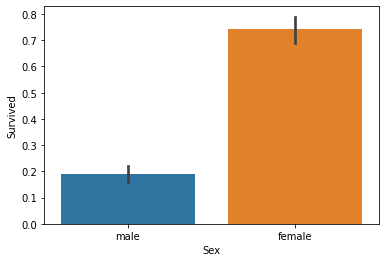

In [28]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

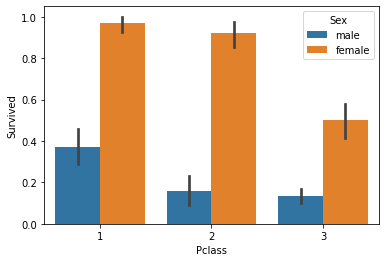

In [30]:
# 객실 등급과 성별에 따른 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

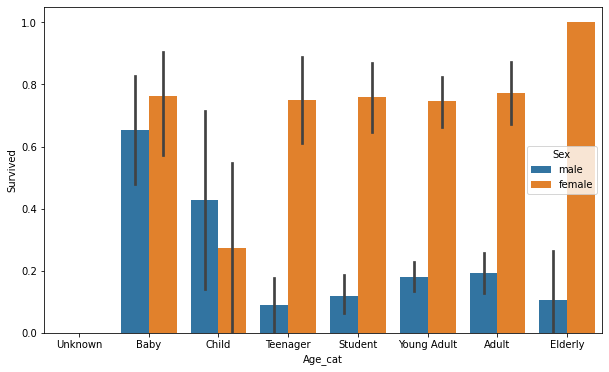

In [31]:
def get_category(age):
  cat=''
  if age<=-1: cat='Unknown'
  elif age<=5: cat='Baby'
  elif age<=12: cat='Child'
  elif age<=18: cat='Teenager'
  elif age<=25: cat='Student'
  elif age<=35: cat='Young Adult'
  elif age<=60: cat='Adult'
  else: cat='Elderly'
  return cat

plt.figure(figsize=(10,6))
group_names=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [32]:
from sklearn import preprocessing

def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])
  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [33]:
from sklearn.preprocessing import LabelEncoder
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
  
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df

def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [34]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7989
RandomForestClassifier 정확도:0.8380
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [40]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  kfold = KFold(n_splits=folds)
  scores = []

  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

  mean_score = np.mean(scores)
  print('평균 정확도: {0:.4f}'.format(mean_score))

In [41]:
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7709
교차 검증 1 정확도: 0.7472
교차 검증 2 정확도: 0.7978
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8258
평균 정확도: 0.7823


In [43]:
# cross_val_score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7697
교차 검증 2 정확도: 0.7978
교차 검증 3 정확도: 0.7978
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7857


In [44]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}
GridSearchCV 최고 정확도: 0.8047
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8603
